> ID Deep Dive

In [1]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import unicodedata
import csv

#### 1. Data Treatment

In [2]:
df = pd.read_csv(
    "Dataset_26_10_2024.csv",
    sep=";",
    header=0,
    encoding="utf-8"
)

# Visualise the first 15 entries
df.head(3)

,Brand,Title,Kilometer,Gas Type,Gear Box,Year,Price,URL,Ad Date,Ad Model,Ad Doors,Ad Colour,Ad ID
0,BMW,BMW 320 d EfficientDynamics Line Sport,117620,Diesel,Manual,2013,17350,https://www.standvirtual.com/carros/anuncio/bm...,3 de outubro de 2024 às 10:04,Série 3,4.0,Cinzento,ID: 8000850438
1,Porsche,Porsche 911 (991) Turbo PDK,5800,Gasolina,Automática,2016,187500,https://www.standvirtual.com/carros/anuncio/po...,6 de setembro de 2024 às 10:11,911 (Todos),2.0,Branco,ID: 8000143482
2,Porsche,Porsche Panamera,120000,Diesel,Automática,2012,39950,https://www.standvirtual.com/carros/anuncio/po...,13 de setembro de 2024 às 2:45,Panamera,5.0,Branco,ID: 8013955242


In [3]:
### Adding ID Number and Short ID Numbers for Analysis

df["ID_Number"] = df["Ad ID"].str.extract(r'(\d{10})')

df["Left_4_ID"] = df["ID_Number"].str[:4]
df["Left_5_ID"] = df["ID_Number"].str[:5]
df["Right_6_ID"] = df["ID_Number"].str[-6:]

In [4]:
### Adding Month column in Text, Short text and Number

df["Month_Text"] = df["Ad Date"].str.extract(r'(janeiro|fevereiro|março|abril|maio|junho|julho|agosto|setembro|outubro|novembro|dezembro)')

df["Month_Text"] = df["Month_Text"].str[:3]

df["Month"] = df["Month_Text"].replace({
    "jan": "1",
    "fev": "2",
    "mar": "3",
    "abr": "4",
    "mai": "5",
    "jun": "6",
    "jul": "7",
    "ago": "8",
    "set": "9",
    "out": "10",
    "nov": "11",
    "dez": "12"
    })

In [5]:
### Adding day of month

df["Day"] = df["Ad Date"].str.extract(r'(\d{1,3})')

In [6]:
### Adding year of ad publication

df["Year"] =df["Ad Date"].str.extract(r'\b(\d{4})\b') 

In [7]:
### Joining newly created column to get a date

df["Full_Date"] = pd.to_datetime(df[['Year', 'Month', 'Day']])

In [8]:
### Checking we have all necessary data

# df = df.drop(columns=['Ad Date', 'Ad ID'])
df.head(3)

,Brand,Title,Kilometer,Gas Type,Gear Box,Year,Price,URL,Ad Date,Ad Model,...,Ad Colour,Ad ID,ID_Number,Left_4_ID,Left_5_ID,Right_6_ID,Month_Text,Month,Day,Full_Date
0,BMW,BMW 320 d EfficientDynamics Line Sport,117620,Diesel,Manual,2024,17350,https://www.standvirtual.com/carros/anuncio/bm...,3 de outubro de 2024 às 10:04,Série 3,...,Cinzento,ID: 8000850438,8000850438,8000,80008,850438,out,10,3,2024-10-03
1,Porsche,Porsche 911 (991) Turbo PDK,5800,Gasolina,Automática,2024,187500,https://www.standvirtual.com/carros/anuncio/po...,6 de setembro de 2024 às 10:11,911 (Todos),...,Branco,ID: 8000143482,8000143482,8000,80001,143482,set,9,6,2024-09-06
2,Porsche,Porsche Panamera,120000,Diesel,Automática,2024,39950,https://www.standvirtual.com/carros/anuncio/po...,13 de setembro de 2024 às 2:45,Panamera,...,Branco,ID: 8013955242,8013955242,8013,80139,955242,set,9,13,2024-09-13


#### 2. Pivot Table by ID Code Digits

##### 2.1 Pivot Table by 4 ID Code Digits

In [9]:
df_left_4_id_pivot = (
    df.pivot_table(
        index='Left_4_ID',
        columns='Month_Text',
        values='Price',
        aggfunc='count'
    )
    .fillna(0)
    .astype(int)
)

print(df_left_4_id_pivot[['mar', 'abr', 'mai', 'jun', 'jul', 'ago', 'set', 'out']])

Month_Text  mar  abr  mai  jun  jul   ago   set    out
Left_4_ID                                             
8000          0    0    0    0    0     0     1      1
8013          0    0    0    1    0     0     1      0
8015          0    0    0    0    0     0     1      0
8016          0    0    0    0    0     0     0      1
8018          0    0    0    0    0     0     1      0
8020          0    0    0    0    0     0     1      0
8028          0    0    0    0    0     0     1      0
8031          0    0    0    0    0     0     1      0
8035          0    0    0    0    0     1     0      0
8040          0    0    0    0    0     0     0      1
8041          0    0    0    0    1     0     1      0
8046          0    0    0    0    0     0     1      0
8048          0    0    0    0    0     1     0      0
8051          0    0    0    0    0     0     2      0
8053          0    0    0    0    0     0     1      0
8056          0    0    0    0    0     0     1      0
8059      

##### 2.2 Pivot Table by 5 ID Code Digits

In [10]:
pd.set_option('display.max_rows', None)

df_left_5_id = df[df["Left_4_ID"].isin(['8092', '8093'])]


df_left_5_id_pivot = (
    df_left_5_id.pivot_table(
        index='Left_5_ID',
        columns='Month_Text',
        values='Price',
        aggfunc='count'
    )
    .fillna(0)
    .astype(int)
)

print(df_left_5_id_pivot[['abr', 'jun', 'jul', 'ago', 'set', 'out']])

Month_Text  abr  jun  jul  ago   set   out
Left_5_ID                                 
80920         0    1    2   79   238   240
80921         1    5    3   74   199   192
80922         0    1    0   68   177   179
80923         0    3    2   93   209   169
80924         0    3    1  100   212   230
80925         0    2    0   69   182   178
80926         0    1    2   99   203   225
80927         0    0    1   47   120    98
80928         0    1    2  190   440   441
80929         0    8    0  163   393   387
80930         0    0    7  233   550   557
80931         0    0    9  299   612   690
80932         0    0    0  363   785   908
80933         0    0    0  342   832  1016
80934         0    0    0    0  1522  1279
80935         0    0    0    0  1786  1909
80936         0    0    0    0   562  4917
80937         0    0    0    0     0  3884




> What I know:

**(1) When an ad listing is renewed, the original ad listing ID is kept** <span style="color:green">CONFIRMED</span>

<p style="font-size:16px;">I created two ads in the same day, on after the other. First one had ID 8093807212 and second ID 8093807218. The second car was sold before renewal (2 weeks), but the first car ad listing had to be renewed. Following the renewal, the ID is still 8093807212. This was also confirmed through the analysis of another randomly selected ad listing which has been renewed since the data in sheet 'SVS_Ad_Info 2' was extracted</p>


**(2) The ad listing date on Standvirtual corresponds to the date of last renewal, not the original date of creatiom** <span style="color:green">CONFIRMED</span>

<p style="font-size:16px;">Also confirmed this through the anaylsis on point (1)</p>

**(3) Furthermore, it seems from the  table above that there is a clear relationship, sequential, between the ad posting date and the 4 digit part of the ID. The ID group #8093 seems to correspond to the most recent listings. The reason why we have old IDs, e.g, #8031, that have currently active ads has to do with the fact that these ads were created a long time ago, and were more recently renewed - i.e., the ID doesn't change, but the publication date changes**

> Questions: 

**(1) How many ad listings are there per first 4 character of the ad listing ID?** <span style="color:red">NOT CONFIRMED</span>

**(2) Assuming a similar amount of ads are posted each month, how long does each 4 digit code last?** <span style="color:red">NOT CONFIRMED</span>

<p style="font-size:16px;">In my dataset, #8093 first appears in July. Considering that #8094 seems to first appear in November (16.11.2024), it seems that code #8093 'lasted' for 5 months</p>

**(3) What is the % of ads which are renewed?** <span style="color:red">NOT CONFIRMED</span>

<p style="font-size:16px;">From my analysis, roughly, the only non-renewed listings are the #8093 from August, September & November (2-month period). I'm assuming only #8093 can be non-renewed since the #8093 lasted 4 months (first appeared in July, #8094 first appeared in November). There are 23.046 which were not renewed (#8093 from those 3 months) - that is 66% of active ads. So, as of this extraction date, about 1/3 of ads were renewed</p>

**(4) Besides the % of ads which are renewed, for how long are they renewed?** <span style="color:red">NOT CONFIRMED</span>

**(5) Wayback Machine Ad Data:**

<p style="font-size:16px;">24 maio 2020        8080118904
31 maio 2020        8041233890
6 junho 2022        8089566485
10 agosto 2022      8085670112
21 novembro 2022    8088144564
23 novembro 2022    8087070698
24 novembro 2022    8087999111
25 novembro 2022    8084809655
27 novembro 2022    8087687458
28 novembro 2022    8088157838
29 novembro 2022    8087855727
7 junho 2023        8089596049</p>


#### 3. ID Correlation

In [11]:
pd.set_option('display.width', 1000)

df_scraped = df.copy()

df_scraped = df_scraped.dropna(subset=['Ad ID'])        ### Drop links not scraped yet (i.e., no Ad ID or date)
df_scraped = df_scraped.dropna(subset=['Ad Date'])      ### Drop 595 ad listings which have Ad ID but no date

df_scraped['Date'] = pd.to_datetime(df['Full_Date'])

blanks = df_scraped[(df_scraped['Full_Date'].isnull())] ### Check if there are any rows with missing date
print(blanks)

Empty DataFrame
Columns: [Brand, Title, Kilometer, Gas Type, Gear Box, Year, Price, URL, Ad Date, Ad Model, Ad Doors, Ad Colour, Ad ID, ID_Number, Left_4_ID, Left_5_ID, Right_6_ID, Month_Text, Month, Day, Full_Date, Date]
Index: []

[0 rows x 22 columns]


##### 3.1 Full Dataset ID Correlation

In [12]:
# Convert 'date' to a numeric format (e.g., timestamp)
df_scraped['Date_Numeric'] = df_scraped['Full_Date'].apply(lambda x: x.timestamp())

# Calculate correlation between 'date_numeric' and 'value'
correlation_ID_Number = df_scraped['Date_Numeric'].corr(df_scraped['ID_Number'])

print("Correlation:", correlation_ID_Number)    

Correlation: 0.24849860485061248


In [13]:
# Convert 'date' to a numeric format (e.g., timestamp)
df_scraped['Date_Numeric'] = df_scraped['Full_Date'].apply(lambda x: x.timestamp())

# Calculate correlation between 'date_numeric' and 'value'
correlation_Left_4_ID = df_scraped['Date_Numeric'].corr(df_scraped['Left_4_ID'])

print("Correlation:", correlation_Left_4_ID)

Correlation: 0.22533832657133787


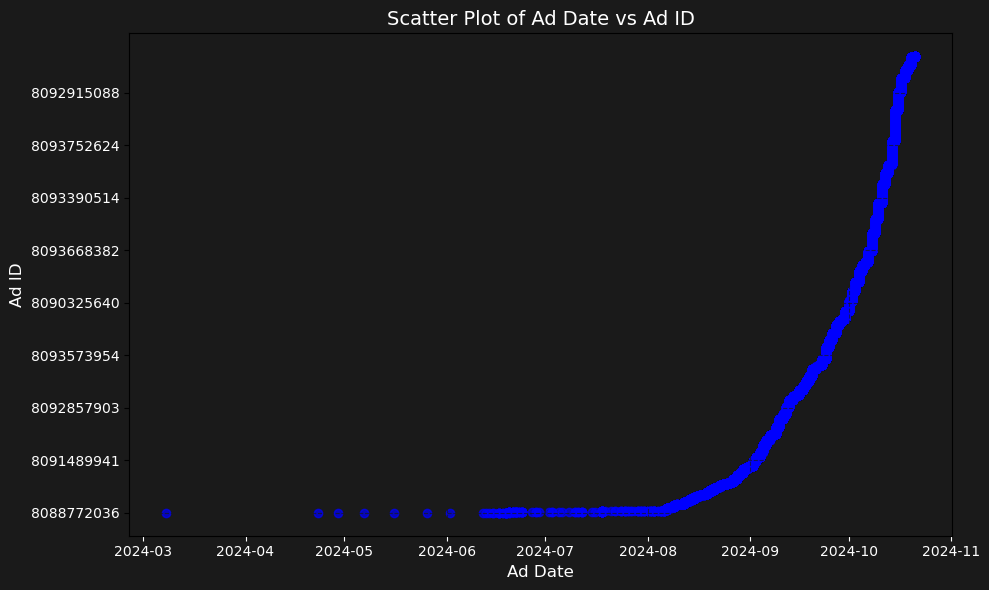

In [40]:
df_scraped____ = df_scraped.sort_values(by=["Date"])
df_scraped____ = df_scraped____.drop(columns=['Brand', 'Title', 'Kilometer', 'Gas Type', 'Gear Box', 'Year', 'Price', 'URL', 'Ad Date', 'Ad Model', 'Ad Doors', 'Ad Colour', 'Ad ID', 'Left_4_ID', 'Right_6_ID', 'Month_Text', 'Month', 'Day', 'Full_Date', 'Left_5_ID', 'Date_Numeric'])

plt.figure(figsize=(10, 6))  # Adjust the figure size for better visibility
ax = plt.gca()  # Get the current axes

# Scatter plot
plt.scatter(
    df_scraped____['Date'], 
    df_scraped____['ID_Number'], 
    color='blue', 
    alpha=0.7,  # Add transparency to handle overlapping points
    edgecolor='blue'
)

# Title and axis labels
plt.title('Scatter Plot of Ad Date vs Ad ID', fontsize=14, color='white')
plt.xlabel('Ad Date', fontsize=12, color='white')
plt.ylabel('Ad ID', fontsize=12, color='white')

# Reduce the number of y-axis labels
y_ticks = df_scraped____['ID_Number'][::4000]  # Show every 10th ID
plt.yticks(ticks=y_ticks, color='white')  # Set tick label color to white

# Set x-axis tick label color to white
ax.tick_params(axis='x', colors='white')  # Set x-axis tick label color

# Add grid
plt.grid(True, linestyle='--', color='#1A1A1A', alpha=0.7)

# Set dark background
plt.gcf().set_facecolor('#1A1A1A')  # Figure background
ax.set_facecolor('#1A1A1A')         # Axes background

# Optimize layout
plt.tight_layout()

# Show the plot
plt.show()

##### 3.2 Non-renewed listings (#8093) Dataset ID Correlation

In [14]:
### I assumed all of #8093 were not renewed. In reality there are 16 #8093 ads which I believe were renewed, from July

df_scraped_filtered_8093 = df_scraped[df_scraped["Left_4_ID"] == "8093"]

In [15]:
# Calculate correlation between 'date_numeric' and 'value'
correlation_ID_Number_8093 = df_scraped_filtered_8093['Date_Numeric'].corr(df_scraped_filtered_8093['ID_Number'])

print("Correlation:", correlation_ID_Number_8093)

Correlation: 0.4910569054397797


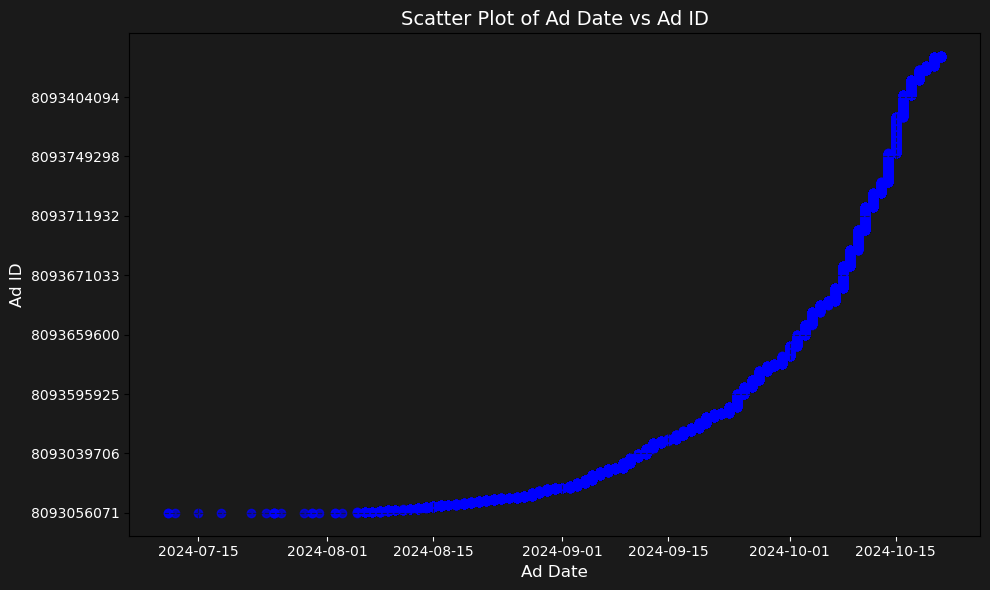

In [37]:
df_scraped_filtered_8093_sorted = df_scraped_filtered_8093.sort_values(by=["Date"])
df_scraped_filtered_8093_sorted = df_scraped_filtered_8093_sorted.drop(columns=['Brand', 'Title', 'Kilometer', 'Gas Type', 'Gear Box', 'Year', 'Price', 'URL', 'Ad Date', 'Ad Model', 'Ad Doors', 'Ad Colour', 'Ad ID', 'Left_4_ID', 'Right_6_ID', 'Month_Text', 'Month', 'Day', 'Full_Date', 'Left_5_ID', 'Date_Numeric'])

plt.figure(figsize=(10, 6))  # Adjust the figure size for better visibility
ax = plt.gca()  # Get the current axes

# Scatter plot
plt.scatter(
    df_scraped_filtered_8093_sorted['Date'], 
    df_scraped_filtered_8093_sorted['ID_Number'], 
    color='blue', 
    alpha=0.7,  # Add transparency to handle overlapping points
    edgecolor='blue'
)

# Title and axis labels
plt.title('Scatter Plot of Ad Date vs Ad ID', fontsize=14, color='white')
plt.xlabel('Ad Date', fontsize=12, color='white')
plt.ylabel('Ad ID', fontsize=12, color='white')

# Reduce the number of y-axis labels
y_ticks = df_scraped_filtered_8093_sorted['ID_Number'][::3000]  # Show every 10th ID
plt.yticks(ticks=y_ticks, color='white')  # Set tick label color to white

# Set x-axis tick label color to white
ax.tick_params(axis='x', colors='white')  # Set x-axis tick label color

# Add grid
plt.grid(True, linestyle='--', color='#1A1A1A', alpha=0.7)

# Set dark background
plt.gcf().set_facecolor('#1A1A1A')  # Figure background
ax.set_facecolor('#1A1A1A')         # Axes background

# Optimize layout
plt.tight_layout()

# Show the plot
plt.show()

In [19]:
# Calculate correlation between 'date_numeric' and 'value'
correlation_Left_5_ID_8093 = df_scraped_filtered_8093['Date_Numeric'].corr(df_scraped_filtered_8093['Left_5_ID'])

print("Correlation:", correlation_Left_5_ID_8093)

Correlation: 0.48756073004052586


In [20]:
### Excluding the 16 #8093 ads from June actually decreases the correlation, which is strange. Because I would think these ads must have been renewed 
### (if they are to follow the 28-day listing rule)

df_scraped_filtered_8093_no_june = df_scraped_filtered_8093
df_scraped_filtered_8093_no_june = df_scraped_filtered_8093_no_june[df_scraped_filtered_8093_no_june["Month_Text"].isin(['ago', 'set', 'out'])]

df_scraped_filtered_8093_no_june = df_scraped_filtered_8093_no_june['Date_Numeric'].corr(df_scraped_filtered_8093_no_june['ID_Number'])

print("Correlation:", df_scraped_filtered_8093_no_june)

Correlation: 0.48946916912681226


##### 3.3 Full Dataset ID & Publication Dates

In [21]:
### Picked an example of ID #8092, with publication date in June 2024

df_scraped_filtered_8092 = df_scraped[df_scraped["Left_4_ID"] == '8092']
df_scraped_filtered_8092 = df_scraped_filtered_8092[df_scraped_filtered_8092["Month_Text"] == 'jun']

df_scraped_filtered_8092_sorted = df_scraped_filtered_8092.sort_values(by=['Full_Date'])

print(df_scraped_filtered_8092_sorted[['Left_4_ID', 'Left_5_ID', 'ID_Number', 'Month_Text', 'Full_Date', 'Right_6_ID']])

      Left_4_ID Left_5_ID   ID_Number Month_Text  Full_Date Right_6_ID
10994      8092     80921  8092185858        jun 2024-06-13     185858
10980      8092     80921  8092190685        jun 2024-06-14     190685
10884      8092     80922  8092203252        jun 2024-06-15     203252
9734       8092     80924  8092458134        jun 2024-06-15     458134
9741       8092     80924  8092457418        jun 2024-06-17     457418
11073      8092     80921  8092171704        jun 2024-06-19     171704
10910      8092     80921  8092199506        jun 2024-06-19     199506
8028       8092     80928  8092813322        jun 2024-06-19     813322
10166      8092     80923  8092359838        jun 2024-06-20     359838
9148       8092     80925  8092555916        jun 2024-06-20     555916
7057       8092     80929  8092900651        jun 2024-06-21     900651
10053      8092     80923  8092376777        jun 2024-06-21     376777
9135       8092     80925  8092557392        jun 2024-06-22     557392
10039 

Looking at the table above it's not clear there's a correlation:

8092457418 -> 17.06.2024 (rigjt_6_id = 457418)

8092171704 -> 19.06.2024 (right_6_id = 171704)

This could be explained by the fact that the ad officially posted on the 19.06.2024 was created before the one from 17.06.2024, but only posted after


##### 3.4 Ads with Date 'Out of Boundaries'

In [22]:
df_scraped_oob_1 = df_scraped[df_scraped['Month_Text'].isin(['mar', 'abr', 'mai', 'jun', 'jul'])]

df_scraped_oob_1 = df_scraped_oob_1.drop(columns=['Title', 'Kilometer', 'Ad Doors', 'Ad Colour', 'Gas Type', 'Gear Box', 'Year', 'Price', 'Ad Date', 'Ad Model', 'Date_Numeric', 'Full_Date'])

print(df_scraped_oob_1)

               Brand                                                URL           Ad ID   ID_Number Left_4_ID Left_5_ID Right_6_ID Month_Text Month Day       Date
3               Ford  https://www.standvirtual.com/carros/anuncio/fo...  ID: 8013276429  8013276429      8013     80132     276429        jun     6  20 2024-06-20
13            Hummer  https://www.standvirtual.com/carros/anuncio/hu...  ID: 8041693271  8041693271      8041     80416     693271        jul     7  18 2024-07-18
24     Mercedes-Benz  https://www.standvirtual.com/carros/anuncio/me...  ID: 8064854482  8064854482      8064     80648     854482        jun     6  22 2024-06-22
30           Porsche  https://www.standvirtual.com/carros/anuncio/po...  ID: 8075131980  8075131980      8075     80751     131980        jun     6  19 2024-06-19
43            Hummer  https://www.standvirtual.com/carros/anuncio/hu...  ID: 8080598412  8080598412      8080     80805     598412        jul     7  18 2024-07-18
45               BMW  

In [23]:
df_scraped_oob_2 = df_scraped[df_scraped['Month_Text'].isin(['mar', 'abr', 'mai'])]

df_scraped_oob_2 = df_scraped_oob_2.drop(columns=['Title', 'Kilometer', 'Ad Doors', 'Ad Colour', 'Gas Type', 'Gear Box', 'Year', 'Price', 'Ad Date', 'Ad Model', 'Date_Numeric', 'Full_Date'])

print(df_scraped_oob_2)

               Brand                                                URL           Ad ID   ID_Number Left_4_ID Left_5_ID Right_6_ID Month_Text Month Day       Date
293      Rolls Royce  https://www.standvirtual.com/carros/anuncio/ro...  ID: 8087849779  8087849779      8087     80878     849779        mai     5  16 2024-05-16
659          Renault  https://www.standvirtual.com/carros/anuncio/re...  ID: 8088772036  8088772036      8088     80887     772036        mar     3   8 2024-03-08
1803   Mercedes-Benz  https://www.standvirtual.com/carros/anuncio/me...  ID: 8089054818  8089054818      8089     80890     054818        mai     5   7 2024-05-07
2960   Mercedes-Benz  https://www.standvirtual.com/carros/anuncio/me...  ID: 8090251665  8090251665      8090     80902     251665        abr     4  23 2024-04-23
5313         Peugeot  https://www.standvirtual.com/carros/anuncio/pe...  ID: 8091368217  8091368217      8091     80913     368217        mai     5  26 2024-05-26
11139            BMW  

##### 3.5 Renewed Ad Estimates

In [24]:
df_renewed_ads = df_scraped[df_scraped["Left_4_ID"] == '8093']
df_renewed_ads = df_renewed_ads[df_renewed_ads["Month_Text"].isin(['ago', 'set', 'out'])]

df_renewed_ads_sum = df_renewed_ads["Brand"].count()
df_scraped_sum = df_scraped["Brand"].count()

percentage_renewed_ads = df_renewed_ads_sum / df_scraped_sum
percentage_non_renewed_ads = 1 - percentage_renewed_ads

formatted_percentage_renewed_ads = f"{percentage_renewed_ads:.2%}"
formatted_percentage_non_renewed_ads = f"{percentage_non_renewed_ads:.2%}"

print(f"According to my estimates, the percentage of non-renewed ads is {formatted_percentage_renewed_ads}")
print(f"According to my estimates, the percentage of renewed ads is {formatted_percentage_non_renewed_ads}")

According to my estimates, the percentage of non-renewed ads is 66.29%
According to my estimates, the percentage of renewed ads is 33.71%
